In [1]:
import numpy as np
import pygtrie
from statsmodels.stats import multitest
import collections
import os
import sys
sys.path.append('../../scripts/')

import matplotlib.pyplot as plt
import mpl_stylesheet
mpl_stylesheet.banskt_presentation(fontfamily = 'latex-clearsans', fontsize = 24)

In [2]:
def read_tejaas(filename):
    rsidlist = list()
    pvallist = list()
    with open(filename, 'r') as instream:
        next(instream)
        for line in instream:
            linesplit = line.strip().split()
            rsid = linesplit[0]
            pval = float(linesplit[5])
            rsidlist.append(rsid)
            pvallist.append(pval)
    return rsidlist, pvallist

In [5]:
pvals = list()

for sim in range(1):
    simdir = "sim{:03d}".format(sim)
    #paramdir = "15158_450_20_800_30_150_100_0.01_0.0_0.0_1.0_0.6_4.0_0.1_20_0.02"
    #paramdir = "15158_450_20_800_30_150_100_0.01_0.0_0.0_1.0_0.6_4.0_0.1_20_0.02"
    #paramdir = "4000_450_20_800_30_150_100_0.01_0.5_0.0_0.5_0.6_4.0_0.1_20_0.02"
    paramdir = "15611_250_20_800_30_150_100_0.01_0.0_0.0_1.0_0.6_4.0_0.1_5_0.02"
    srcdir = os.path.join('/scratch/sbanerj/trans-eqtl/simulation/', paramdir, simdir)
    randfile = os.path.join(srcdir, 'tejaas_rand/permnull_sb0.05/rr.txt')
    rrfile = os.path.join(srcdir, 'tejaas/permnull_sb0.05/rr.txt')
    
    rr_rsids, rr_pvals = read_tejaas(rrfile)
    pvals += rr_pvals
    
pvals = np.array(pvals)
select, pcorr = multitest.fdrcorrection(pvals, alpha = 0.005)

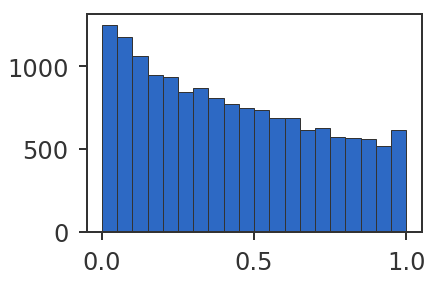

In [6]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.hist(pvals)
plt.show()

In [7]:
pvals[np.argsort(pcorr)][:100]

array([1.16044e-05, 3.88057e-05, 5.97945e-05, 6.21328e-05, 3.88844e-05,
       2.17717e-04, 2.15290e-04, 2.02447e-04, 2.34836e-04, 1.72643e-04,
       1.39254e-04, 2.25928e-04, 9.37219e-05, 1.22780e-04, 2.12823e-04,
       2.38304e-04, 2.02649e-04, 1.67139e-04, 2.69719e-04, 5.38081e-04,
       4.17268e-04, 4.28521e-04, 3.25893e-04, 5.37328e-04, 3.18486e-04,
       5.26871e-04, 4.08189e-04, 5.32732e-04, 3.62764e-04, 4.13990e-04,
       5.06222e-04, 5.40266e-04, 5.47102e-04, 4.78798e-04, 4.36251e-04,
       4.05244e-04, 3.79247e-04, 3.51033e-04, 5.64330e-04, 6.69655e-04,
       6.53068e-04, 6.24297e-04, 6.54723e-04, 7.20857e-04, 7.48594e-04,
       9.15932e-04, 9.17208e-04, 9.05885e-04, 8.70023e-04, 8.69363e-04,
       8.77017e-04, 8.75738e-04, 9.84287e-04, 9.71695e-04, 1.02027e-03,
       1.01064e-03, 1.08235e-03, 1.08381e-03, 1.06040e-03, 1.10830e-03,
       1.22728e-03, 1.23802e-03, 1.24711e-03, 1.25881e-03, 1.29153e-03,
       1.30507e-03, 1.34637e-03, 1.43793e-03, 1.47565e-03, 1.529

In [8]:
pvals.shape

(15611,)

In [11]:
np.sum(pvals<0.05)

1252